<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Homework-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics Homework 01
## Author: Colin Scherer

## **1. Determining my machine precision:**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

exp = 55

for e in range(exp):
  res32 = np.float32(1+2**-e)
  if(res32 == 1.0):
    print("Machine epsilon for single precision float: 2^-{}".format(e))
    break

for e in range(exp):
  res64 = np.float64(1+2**-e)
  if(res64 == 1.0):
    print("Machine epsilon for double precision float: 2^-{}".format(e))
    break


Machine epsilon for single precision float: 2^-24
Machine epsilon for double precision float: 2^-53


These values are exactly as expected (from https://en.wikipedia.org/wiki/Machine_epsilon). Numbers are only able to be finitely precise in computers, which means there cannot be infinitely small decimals. The machine epsilon represents the smallest possible decimal that a certain datatype is able to store.

##**2. Error Assessment:**

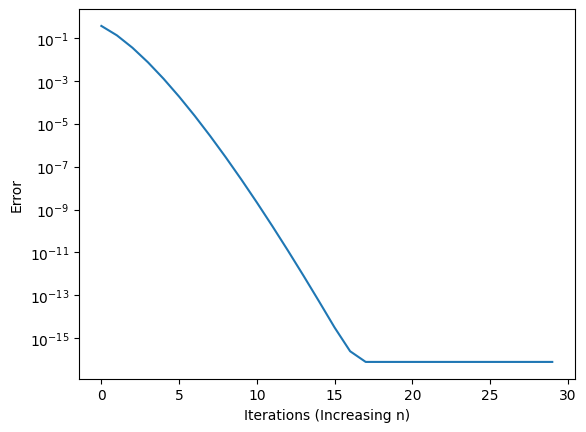

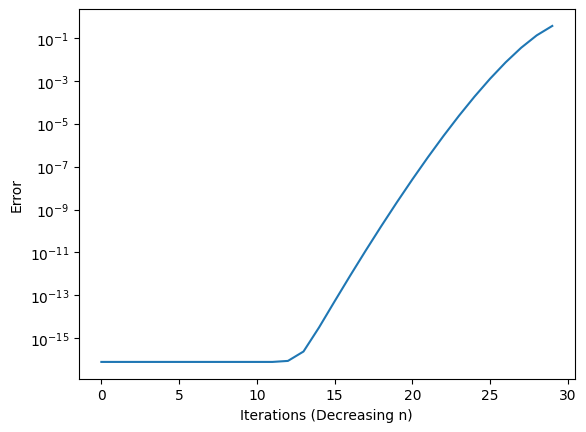

In [3]:
xs = np.linspace(0, 1, 50)
actual = np.exp(-xs)


func = np.zeros((50,), dtype=np.float64)
errs = []
N = 30

for n in range(N):
  func += np.array((-xs)**n/math.factorial(n), dtype=np.float64)
  errs.append(np.mean(abs(actual-func)))


plt.plot(np.arange(0, N), errs)
plt.yscale('log')
plt.ylabel("Error")
plt.xlabel("Iterations (Increasing n)")
plt.show()


errs = []
for n in range(N,0,-1):
  func += np.array((-xs)**n/math.factorial(n), dtype=np.float64)
  errs.append(np.mean(abs(actual-func)))


plt.plot(np.arange(N,0,-1)*-1+N, errs)
plt.yscale('log')
plt.ylabel("Error")
plt.xlabel("Iterations (Decreasing n)")
plt.show()

From this, it's better to start the summation with larger numbers with increasing n as the iterations converge to a low error. When the summation is started with smaller numbers, the error starts very low, but then increases as n decreases. (Note that in the plot with decreasing n, the x-axis starts at N=30)

## **3. Finding binary representation:**

When finding binary representations, each bit to the right of the decimal point is a decreasing multiple of 2. One bit to the right represents $2^{-1}$, two bits to the right represents $2^{-2}$, and so on. We can determine the binary representation of the fractional part by multiplying by two, and if the result is over one, record a one, and if the result is less than one, record a zero, and continue on until the fractional part becomes zero.

My work is shown below: $$\begin{align} \text{To the left of the decimal, } 1=0...01.\\ \text{To the right of the decimal, } 0.252011*2 = 0.504022 \Rightarrow 0\\0.504022*2=1.008044\Rightarrow 1\\0.008044*2=0.016088\Rightarrow 0\\0.016088*2=0.032176\Rightarrow 0\\0.032176*2=0.064352\Rightarrow 0\\0.064352*2=0.128704\Rightarrow 0\\0.128704*2=0.257408\Rightarrow 0\\0.257408*2=0.514816\Rightarrow 0\\0.514816*2=1.029632\Rightarrow 1\\0.029632*2=0.059264\Rightarrow 0\\0.059264*2=0.118528\Rightarrow 0\\0.118528*2=0.237056\Rightarrow 0\\0.237056*2=0.474112\Rightarrow 0\\0.474112*2=0.948224\Rightarrow 0\\0.948224*2=1.896448\Rightarrow 1\\0.896448*2=1.792896\Rightarrow 1\\0.792896*2=1.585792\Rightarrow 1\\0.585792*2=1.171584\Rightarrow 1\\0.171584*2=0.343168\Rightarrow 0\\0.343168*2=0.686336\Rightarrow 0\\0.686336*2=1.372672\Rightarrow 1\\0.372672*2=0.745344\Rightarrow 0\\0.745344*2=1.490688\Rightarrow 1\end{align}$$Since single precision is only accurate to 23 decimal points, we will stop here, but this is not the "finitely precise" result. $$1.252011 = 0b1.01000000100000111100101$$The IEEE representation of a number uses 32 bits: the left-most is a sign bit, which in this case is 0, since our number is positive. The next 8 bits represent the exponent (E), which comes into the representation in the form $2^{E-127}$. Since it is assumed that the number has a leading one, our exponent should be zero, which means that $E=127$. In binary, $E=0b01111111$. Now, we can just take the decimal portion found above and plug it into the last 23 bits. Combining all of this, the IEEE single representation of 1.252011 is: $$00111111101000000100000111100101$$

## **4. Numerical Integration:**


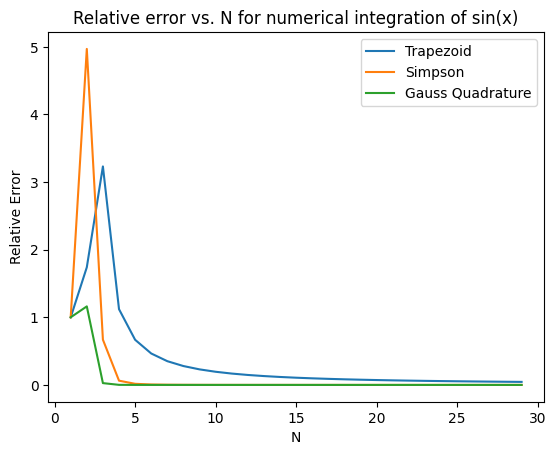

In [13]:
def quadratic(x):
  return x**2

def cubic(x):
  return x**3

def trapezoid(f, xmin, xmax, splits):
  xs = np.linspace(xmin, xmax, splits)
  ys = f(xs)
  ymins = ys[:-1]
  ymaxs = ys[1:]
  return sum(((ymaxs+ymins)/2)*((xmax-xmin)/splits))

def simpson(f, xmin, xmax, splits):
  xs = np.linspace(xmin, xmax, splits)
  return sum(((xs[1:]-xs[:-1])/6)*(f(xs[:-1])+4*f((xs[:-1]+xs[1:])/2)+f(xs[1:])))

def gauss_quad(f, xmin, xmax, splits):
  xs = np.linspace(xmin, xmax, splits)
  coeffs = (xs[1:]-xs[:-1])/2
  offset = (xs[1:]+xs[:-1])/2
  return np.sum(coeffs*((f(0+offset)*8/9)+(f(-coeffs*(3/5)**0.5+offset)*5/9)+(f(coeffs*(3/5)**0.5+offset)*5/9)))


max_n = 30
min_x = 0
max_x = 10
trap_vals = []
simp_vals = []
gaus_vals = []
actual_vals = []

for n in range(1,max_n):
  trap_vals.append(trapezoid(np.sin, min_x, max_x, n))
  simp_vals.append(simpson(np.sin, min_x, max_x, n))
  gaus_vals.append(gauss_quad(np.sin, min_x, max_x, n))
  actual_vals.append(-np.cos(max_x)+np.cos(min_x))

plt.plot(np.arange(1,max_n), np.abs(np.array(actual_vals)-np.array(trap_vals))/np.array(actual_vals), label="Trapezoid")
plt.plot(np.arange(1,max_n), np.abs(np.array(actual_vals)-np.array(simp_vals))/np.array(actual_vals), label="Simpson")
plt.plot(np.arange(1,max_n), np.abs(np.array(actual_vals)-np.array(gaus_vals))/np.array(actual_vals), label="Gauss Quadrature")
plt.ylabel("Relative Error")
plt.xlabel("N")
plt.title("Relative error vs. N for numerical integration of sin(x)")
plt.legend()
plt.show()

Generally, gaussian quadrature and Simpson's rule perform much better than the trapezoid rule, converging much more quickly -- generally, no more than 3 subdivisions is even needed for gaussian quadrature. In my testing with more simple functions ($x^2$, $x^3$, etc.), simpson's rule and gaussian quadrature generally had zero error with one or two subdivisions, while the trapezoid rule was quite far away.

Interestingly, when integrating $sin(x)$ as shown above, Simpson's rule actually hits the maximum error out of all approaches, but converges extremely quickly afterwards, while trapezoid rule converges much slower. This tells me that Simpson's rule can be quite volatile with low subdivisions, but with sufficiently large subdivisions easily outperforms trapezoid rule.